In [145]:
# multivariate multi-step data preparation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel,FFT
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape, mase

df = pd.read_csv('Dasatest_N.csv')
print(df)
df['Month'] = pd.to_datetime(df.Month , format = '%d-%m-%Y')
# data = df.drop(['Month'], axis=1)
# data.index = df.Month
# cols = df.columns
# print(cols)
df1 = df[["Month","Region 1"]]
series = TimeSeries.from_dataframe(df1,'Month')
print(series)

         Month  Region 1  Region 2  Region 3  Region 4  Region 5  Region 6  \
0   01-01-2013  0.154325  0.119708  0.178236  0.225016  0.318976  0.049922   
1   01-02-2013  0.122901  0.119831  0.165497  0.220602  0.316835  0.082337   
2   01-03-2013  0.127583  0.112970  0.190754  0.224240  0.328486  0.083182   
3   01-04-2013  0.501557  0.326049  0.321733  0.330916  0.483001  0.156701   
4   01-05-2013  0.103551  0.098852  0.203126  0.268934  0.380898  0.013289   
..         ...       ...       ...       ...       ...       ...       ...   
67  01-08-2018  0.234171  0.218367  0.263643  0.228902  0.289498  0.182184   
68  01-09-2018  0.294693  0.275179  0.296751  0.291502  0.368923  0.254764   
69  01-10-2018  0.373754  0.344997  0.400269  0.364874  0.416527  0.274649   
70  01-11-2018  0.333642  0.300503  0.360406  0.311379  0.372523  0.270893   
71  01-12-2018  0.242176  0.215147  0.335923  0.271102  0.392835  0.158835   

    Region 7  Region 8  Region 9  ...  Region 3906  Region 3907

In [146]:
s1 = series.pd_dataframe()
s = np.array(s1)
print(s.shape)
print(s)

(72, 1)
[[ 0.1543245 ]
 [ 0.12290076]
 [ 0.12758278]
 [ 0.50155681]
 [ 0.103551  ]
 [ 0.05198335]
 [ 0.14027175]
 [ 0.15758622]
 [ 0.18254627]
 [ 0.18180114]
 [-0.01349557]
 [ 0.21395814]
 [ 0.20258455]
 [ 0.2563813 ]
 [ 0.32765601]
 [ 0.27794359]
 [ 0.20062283]
 [ 0.1416732 ]
 [ 0.13345706]
 [ 0.09270814]
 [ 0.12422531]
 [ 0.19940868]
 [ 0.21158379]
 [ 0.25608766]
 [ 0.04684521]
 [ 0.05022351]
 [ 0.04473823]
 [ 0.04960181]
 [ 0.18571285]
 [ 0.14193271]
 [ 0.03224444]
 [ 0.10161354]
 [ 0.20295333]
 [ 0.18560384]
 [ 0.0832224 ]
 [ 0.09790356]
 [ 0.24112035]
 [ 0.26463583]
 [ 0.25328632]
 [ 0.42299889]
 [ 0.46444213]
 [ 0.31672028]
 [ 0.22431353]
 [ 0.3382892 ]
 [ 0.37835167]
 [ 0.5200462 ]
 [ 0.39128034]
 [ 0.31472636]
 [ 0.27020041]
 [ 0.36276484]
 [ 0.37672814]
 [ 0.39498583]
 [ 0.34769203]
 [ 0.35111652]
 [ 0.37512038]
 [ 0.28964867]
 [ 0.37237919]
 [ 0.39812233]
 [ 0.3626103 ]
 [ 0.26376623]
 [ 0.27562195]
 [ 0.2521733 ]
 [ 0.33691267]
 [ 0.32182839]
 [ 0.32189462]
 [ 0.33701822]
 [

In [147]:
train, val = series.split_after(pd.Timestamp('2017-12-01'))

In [148]:
print(val)

<TimeSeries (DataArray) (Month: 12, component: 1, sample: 1)>
array([[[0.27562195]],

       [[0.2521733 ]],

       [[0.33691267]],

       [[0.32182839]],

       [[0.32189462]],

       [[0.33701822]],

       [[0.12158118]],

       [[0.2341713 ]],

       [[0.29469256]],

       [[0.37375369]],

       [[0.3336417 ]],

       [[0.24217588]]])
Coordinates:
  * Month      (Month) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
  * component  (component) object 'Region 1'
Dimensions without coordinates: sample


In [149]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
# val_transformed = transformer.transform(val)
# # create month and year covariate series
# year_series = datetime_attribute_timeseries(pd.date_range(start=series.start_time(), freq=series.freq_str, periods=100),
#                                              attribute='year', one_hot=False)
# year_series = Scaler().fit_transform(year_series)
# month_series = datetime_attribute_timeseries(year_series, attribute='month', one_hot=True)
# covariates = year_series.stack(month_series)
# cov_train, cov_val = covariates.split_after(pd.Timestamp('01-01-2018'))

In [150]:
from darts.models import ExponentialSmoothing

my_model = ExponentialSmoothing()

In [151]:
my_model.fit(train_transformed)
# my_model.fit(train)

In [152]:
pred_series = my_model.predict(n=12)
pred = transformer.inverse_transform(pred_series)

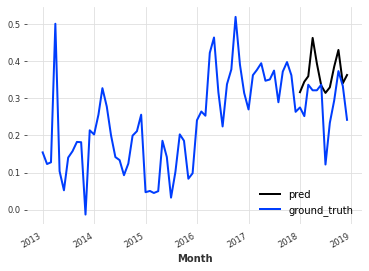

In [153]:
pred.plot(label = 'pred')
series.plot(label = 'ground_truth')
plt.legend()

In [154]:
from darts.models import Theta , ARIMA, VARIMA ,AutoARIMA
from darts.utils.likelihood_models import GaussianLikelihood

def eval_model(model):
#     model.fit(train)
    model.fit(train_transformed)
    forecast_trans = model.predict(len(val))
    forecast = transformer.inverse_transform(forecast_trans)
    print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))
    forecast.plot(label = 'pred')
    series.plot(label = 'ground_truth')
    plt.legend()
    plt.show()

model Exponential smoothing obtains MAPE: 35.34%


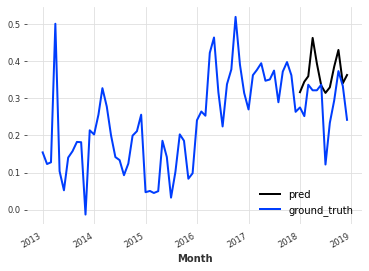

In [155]:
eval_model(ExponentialSmoothing())

C:\Users\dhruv\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


model ARIMA(12, 1, 1) obtains MAPE: 27.02%


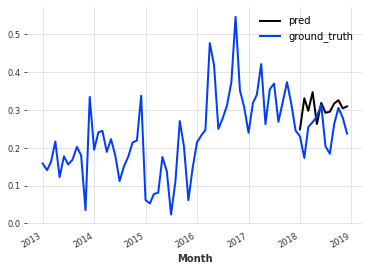

In [139]:
eval_model(ARIMA(p=12,q=1,d=1,trend='t'))

model FFT(nr_freqs_to_keep=50, trend=None) obtains MAPE: 50.45%


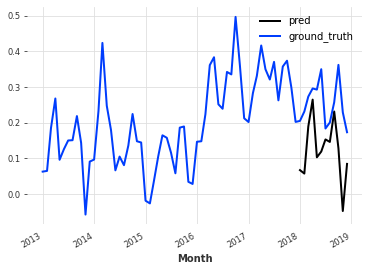

In [68]:
eval_model(FFT(nr_freqs_to_keep = 50))

In [ ]:
eval_model(AutoARIMA())

In [ ]:
# parameters ={
#     "p" : [1,2,3,4],
#     "q" : [2,6,8,12,15],
#     "d" : [1]
# }
# Model_VARIMA = VARIMA.gridsearch(parameters=parameters,
#                                 series = train,
#                                 forecast_horizon = 12,
#                                 start = 0.6,
#                                 last_points_only = False,
#                                 metric = mape,
#                                 reduction = np.mean)

In [ ]:
eval_model(VARIMA(p=1,d=1,q=9))

In [ ]:
eval_model(RNNModel(
    model='LSTM',
    hidden_dim=450,
    n_rnn_layers = 3,
    dropout=0.3,
    batch_size=24,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-4},
    random_state=0,
    training_length=24,
    input_chunk_length=24,
    output_chunk_length =12,
    force_reset=True,
    save_checkpoints=True,
))

[2021-11-17 00:58:36,415] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 36 samples.
[2021-11-17 00:58:36,415] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 36 samples.
[2021-11-17 00:58:36,459] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-11-17 00:58:36,459] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


In [ ]:
eval_model(TCNModel(dropout = 0.6,
    batch_size= 24,
    n_epochs = 1000,
    num_layers = 4,
    optimizer_kwargs={'lr': 1e-4},
    random_state=0,
    input_chunk_length=24,
    output_chunk_length=12,
    kernel_size=2,
    num_filters=4))

model LGBModel(lags=[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], lags_past=None, lags_future=None) obtains MAPE: 39.60%


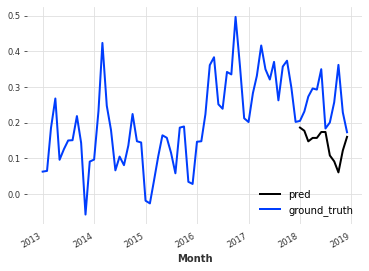

In [98]:
from darts.models import LightGBMModel
eval_model(LightGBMModel(lags = 12))

In [ ]:
eval_model(TransformerModel(
    input_chunk_length = 24,
    output_chunk_length = 12,
    batch_size = 32,
    n_epochs = 500,
    nr_epochs_val_period = 10,
    d_model = 32,
    nhead = 16,
    num_encoder_layers = 4,
    num_decoder_layers = 4,
    dim_feedforward = 512,
    dropout = 0.2,
    activation = "relu",
    random_state = 0,
))

In [ ]:
eval_model(NBEATSModel(input_chunk_length = 20, output_chunk_length = 12))

In [ ]:
eval_model(BlockRNNModel(input_chunk_length = 20, output_chunk_length = 12))

C:\Users\dhruv\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dhruv\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dhruv\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dhruv\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

model <darts.models.forecasting.regression_ensemble_model.RegressionEnsembleModel object at 0x0000012C73BF12B0> obtains MAPE: 23.63%


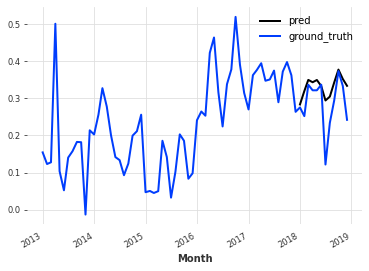

In [156]:
from darts.models import RegressionEnsembleModel
from sklearn.linear_model import RidgeCV
model_exp = ExponentialSmoothing()
model_ARIMA = ARIMA(p=20,q=1,d=1,trend='t')
model_TCN = TCNModel(dropout=0.6,
    batch_size=24,
    n_epochs=1000,
    optimizer_kwargs={'lr': 1e-4},
    random_state=0,
    input_chunk_length=24,
    output_chunk_length=12,
    kernel_size=4,
    num_filters=4)
model_Auto = AutoARIMA()
model_NBEATS = NBEATSModel(input_chunk_length = 20, output_chunk_length = 12)
model_RNN = RNNModel(
    model='LSTM',
    hidden_dim=450,
    n_rnn_layers = 3,
    dropout=0.3,
    batch_size=24,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-4},
    random_state=0,
    training_length=24,
    input_chunk_length=24,
    output_chunk_length =12,
    force_reset=True,
    save_checkpoints=True,
)
model_block = BlockRNNModel(input_chunk_length = 20, output_chunk_length = 12)

model_trans = TransformerModel(
    input_chunk_length = 24,
    output_chunk_length = 12,
    batch_size = 32,
    n_epochs = 500,
    nr_epochs_val_period = 10,
    d_model = 32,
    nhead = 16,
    num_encoder_layers = 4,
    num_decoder_layers = 4,
    dim_feedforward = 512,
    dropout = 0.2,
    activation = "relu",
    random_state = 0,
)
model_VARIMA = VARIMA(p=12,q=12)
model_FFT = FFT(nr_freqs_to_keep = 50)
eval_model(RegressionEnsembleModel(
    [model_ARIMA,model_FFT,model_exp],
    regression_train_n_points = 12))

In [143]:
pred1 = pred.pd_dataframe()
pred1 = np.array(pred1)
print(pred1.shape)
print(pred1[:,1])

(12, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
# output = pd.DataFrame(pred1)
# output.to_csv('submission_RNN_2.csv')
# print("Your submission was successfully saved!")